In [76]:
# Dependencies
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import json
import seaborn as sns
from datetime import datetime
from random import uniform
from config import api_key

In [77]:
# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [78]:
# Generate cities from random coordinates
city_lat = np.random.uniform(-90, 90, size=1000)
city_lng = np.random.uniform(-180, 180, size=1000)

In [79]:
# generate dataframe for cities coordinates
city_df = {"lat": city_lat, "lng": city_lng}
city_df = pd.DataFrame(city_df)
city_df.head()

,lat,lng
0,36.044648,32.550442
1,-7.910821,-127.081942
2,-73.930153,-135.745200
3,6.109089,164.316138
4,-31.827245,45.107819


In [80]:
# Loop through coordinates in dataframe
for index, row in city_df.iterrows():
    city = citipy.nearest_city(row["lat"], row["lng"]).city_name
    country = citipy.nearest_city(row["lat"], row["lng"]).country_code.upper()
    city_df.set_value(index, "City", city)
    city_df.set_value(index, "Country", country)
# Count number of different cities were generated
len(city_df)

1000

In [81]:
# Drop duplicates cities
city_df.drop_duplicates(subset="City")
len(city_df)

1000

In [82]:
# check number of cities we grab are 500
city_sample_df = city_df.sample(n=560)
city_sample_df.reset_index(inplace=True)
city_sample_df.head()

,index,lat,lng,City,Country
0,71,-83.554977,-54.916780,ushuaia,AR
1,2,-73.930153,-135.745200,rikitea,PF
2,202,65.975651,11.649134,bronnoysund,NO
3,786,-57.987319,-141.805167,mataura,PF
4,477,-14.512237,112.283141,ambulu,ID


In [83]:
# Loop through and grab the information using openweathermap
print("Beginning Data Retrieval")
print('-----------------------------')
counter = 0
for index, rows in city_sample_df.iterrows():
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + (rows["City"])
    cities_weather = requests.get(query_url).json()
    try:
        city_sample_df.set_value(index, "Max Temp", cities_weather["main"]["temp_max"])
        city_sample_df.set_value(index, "Humidity", cities_weather["main"]["humidity"])
        city_sample_df.set_value(index, "Wind Speed", cities_weather["wind"]["speed"])   
        city_sample_df.set_value(index, "Cloudiness", cities_weather["clouds"]["all"])
        city_sample_df.set_value(index, "Date", cities_weather["dt"])
        counter = counter + 1
        print ("Processing Record: ", counter, " of Set 1 |" , cities_weather["name"])
        print (query_url)  
    except:
        continue

Beginning Data Retrieval
-----------------------------
Processing Record:  1  of Set 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=ushuaia
Processing Record:  2  of Set 1 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=rikitea
Processing Record:  3  of Set 1 | Bronnoysund
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=bronnoysund
Processing Record:  4  of Set 1 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=mataura
Processing Record:  5  of Set 1 | Ambulu
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=ambulu
Processing Record:  6  of Set 1 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=carnarvon
Processing Record

Processing Record:  53  of Set 1 | Codrington
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=codrington
Processing Record:  54  of Set 1 | Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=hermanus
Processing Record:  55  of Set 1 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=albany
Processing Record:  56  of Set 1 | Waipawa
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=waipawa
Processing Record:  57  of Set 1 | Kishapu
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=kishapu
Processing Record:  58  of Set 1 | Aykino
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=aykino
Processing Record:  59  of Set 1 | Tuktoyaktuk
http://api.openweathermap

Processing Record:  106  of Set 1 | Georgetown
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=georgetown
Processing Record:  107  of Set 1 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=mataura
Processing Record:  108  of Set 1 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=albany
Processing Record:  109  of Set 1 | Sovetskiy
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=sovetskiy
Processing Record:  110  of Set 1 | Gimbi
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=gimbi
Processing Record:  111  of Set 1 | Cidreira
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=cidreira
Processing Record:  112  of Set 1 | Port Elizabeth
http://api.op

Processing Record:  158  of Set 1 | Limbang
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=limbang
Processing Record:  159  of Set 1 | Oslo
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=oslo
Processing Record:  160  of Set 1 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=kaitangata
Processing Record:  161  of Set 1 | Clarence Town
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=clarence town
Processing Record:  162  of Set 1 | San Patricio
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=san patricio
Processing Record:  163  of Set 1 | Castro
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=castro
Processing Record:  164  of Set 1 | Thompson
http:

Processing Record:  211  of Set 1 | Grand-Santi
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=grand-santi
Processing Record:  212  of Set 1 | Hobart
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=hobart
Processing Record:  213  of Set 1 | Shenjiamen
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=shenjiamen
Processing Record:  214  of Set 1 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=qaanaaq
Processing Record:  215  of Set 1 | Hobart
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=hobart
Processing Record:  216  of Set 1 | Thompson
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=thompson
Processing Record:  217  of Set 1 | Blagoyevo
http://api.o

Processing Record:  263  of Set 1 | Yumen
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=yumen
Processing Record:  264  of Set 1 | Praya
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=praya
Processing Record:  265  of Set 1 | Naze
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=naze
Processing Record:  266  of Set 1 | Atuona
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=atuona
Processing Record:  267  of Set 1 | Yenagoa
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=yenagoa
Processing Record:  268  of Set 1 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=busselton
Processing Record:  269  of Set 1 | Lebu
http://api.openweathermap.org/data/2.5/we

Processing Record:  316  of Set 1 | Castro
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=castro
Processing Record:  317  of Set 1 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=ostrovnoy
Processing Record:  318  of Set 1 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=cape town
Processing Record:  319  of Set 1 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=quatre cocos
Processing Record:  320  of Set 1 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=ixtapa
Processing Record:  321  of Set 1 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=qaanaaq
Processing Record:  322  of Set 1 | Avarua
http://api.op

Processing Record:  368  of Set 1 | Lashio
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=lashio
Processing Record:  369  of Set 1 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=punta arenas
Processing Record:  370  of Set 1 | Tiksi
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=tiksi
Processing Record:  371  of Set 1 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=punta arenas
Processing Record:  372  of Set 1 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=rikitea
Processing Record:  373  of Set 1 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=sao filipe
Processing Record:  374  of Set 1 | Aklavik
http:/

Processing Record:  421  of Set 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=ushuaia
Processing Record:  422  of Set 1 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=norman wells
Processing Record:  423  of Set 1 | Marsh Harbour
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=marsh harbour
Processing Record:  424  of Set 1 | Talnakh
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=talnakh
Processing Record:  425  of Set 1 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=vila franca do campo
Processing Record:  426  of Set 1 | Dingle
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=dingle
Processing Record:  427 

Processing Record:  473  of Set 1 | Tezu
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=tezu
Processing Record:  474  of Set 1 | Noumea
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=noumea
Processing Record:  475  of Set 1 | Buala
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=buala
Processing Record:  476  of Set 1 | Erdenet
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=erdenet
Processing Record:  477  of Set 1 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=tuktoyaktuk
Processing Record:  478  of Set 1 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=836aec6d378533da1ceb6b92e44c8f9f&units=imperial&q=cape town
Processing Record:  479  of Set 1 | Vao
http://api.openweathermap.org/

In [84]:
# count number of cities information were grab
city_sample_df = city_sample_df.dropna(how='any')
city_sample_df.count()

index         519
lat           519
lng           519
City          519
Country       519
Max Temp      519
Humidity      519
Wind Speed    519
Cloudiness    519
Date          519
dtype: int64

In [85]:
# grab the data to dataframe 
city_final_df = pd.DataFrame(city_sample_df["City"])
city_final_df['Cloudiness(%)'] = city_sample_df['Cloudiness']
city_final_df['Country'] = city_sample_df[('Country')]
city_final_df['Date'] = city_sample_df['Date']
city_final_df['Humidity(%)'] = city_sample_df['Humidity'].map("{:0.0f}".format)
city_final_df['Lat'] = city_sample_df['lat'].map("{:.2f}".format)
city_final_df['Lng'] = city_sample_df['lng'].map("{:.2f}".format)
city_final_df['Temperature(F)'] = city_sample_df['Max Temp'].map("{:.1f}".format)
city_final_df['Wind Speed(mph)'] = city_sample_df['Wind Speed']

In [86]:
# Show the final dataframe
samplecity = city_final_df
samplecity.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Lat,Lng,Temperature(F),Wind Speed(mph)
0,ushuaia,90.0,AR,1.523221e+09,60,-83.55,-54.92,42.8,6.93
1,rikitea,68.0,PF,1.523223e+09,100,-73.93,-135.75,76.6,12.19
2,bronnoysund,88.0,NO,1.523221e+09,69,65.98,11.65,35.6,11.41
3,mataura,92.0,PF,1.523223e+09,99,-57.99,-141.81,44.7,8.16
4,ambulu,24.0,ID,1.523223e+09,100,-14.51,112.28,77.2,4.36


In [87]:
# Save dataframe to csv file
samplecity.to_csv("weatherpy.csv", encoding="utf-8", index=False)

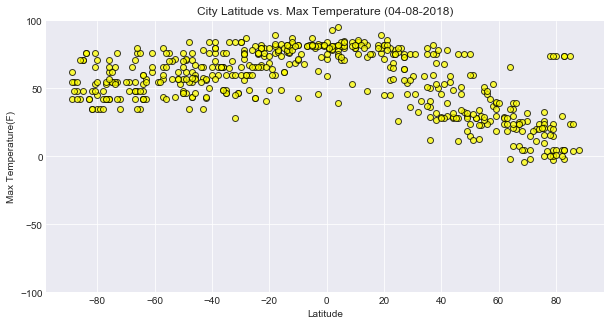

In [93]:
# Latitude vs Temperature Plot
# Build a scatter plot for each data type
current_date = datetime.now().strftime("%m-%d-%Y")
#print('\033[1m' + "Latitude vs Temperature Plot")
plt.figure(figsize=(10,5))
plt.scatter(x=city_final_df['Lat'].apply(float).apply(int),
            y=city_final_df['Temperature(F)'].apply(float).apply(int),c="yellow",marker ='o',edgecolors='black',alpha=0.75)
# Set the Titles and x,y labels 
plt.title("City Latitude vs. Max Temperature (" + str(current_date) + ")")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.yticks(np.arange(-100, 150, 50))
plt.xticks(np.arange(-80, 100, 20))
plt.grid(True)
sns.set_style('darkgrid')
# save the plot
plt.savefig("temperature.png")
plt.show()

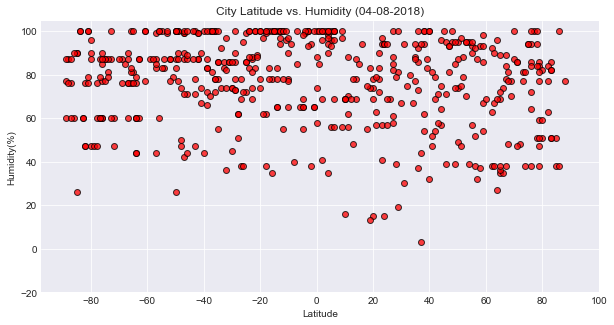

In [94]:
# Latitude vs Humidity Plot
# Build a scatter plot for each data type
plt.figure(figsize=(10,5))
plt.scatter(x=city_final_df['Lat'].apply(float).apply(int),
            y=city_final_df['Humidity(%)'].apply(float).apply(int),c="red",marker ='o',edgecolors='black',alpha=0.75)
# Set the Titles and x,y labels
plt.title("City Latitude vs. Humidity (" + str(current_date) + ")")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.yticks(np.arange(-20, 120, 20))
plt.xticks(np.arange(-80, 120, 20))
plt.grid(True)
sns.set_style('darkgrid')
# save the plot
plt.savefig("humidity.png")
plt.show()

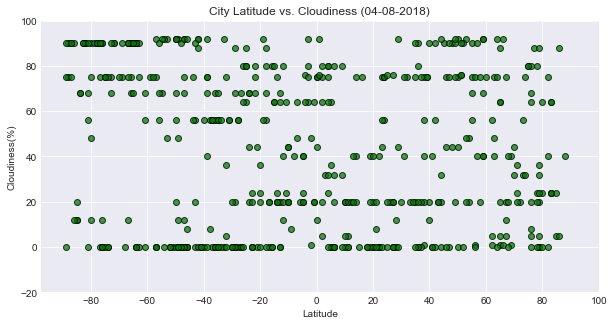

In [95]:
# Latitude vs Cloudiness Plot 
# Build a scatter plot for each data type
plt.figure(figsize=(10,5))
plt.scatter(x=city_final_df['Lat'].apply(float).apply(int),
            y=city_final_df['Cloudiness(%)'].apply(float).apply(int),c="green",marker ='o',edgecolors='black',alpha=0.75)
# Set the Titles and x,y labels
plt.title("City Latitude vs. Cloudiness (" + str(current_date) + ")")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.yticks(np.arange(-20, 120, 20))
plt.xticks(np.arange(-80, 120, 20))
plt.grid(True)
sns.set_style('darkgrid')
# save the plot
plt.savefig("cloudiness.png")
plt.show()

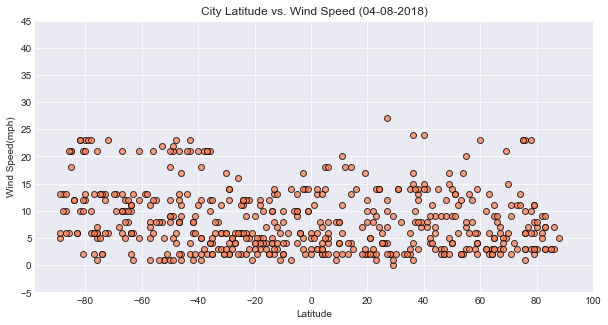

In [96]:
# Latitude vs Wind Speed Plot
# Build a scatter plot for each data type
plt.figure(figsize=(10,5))
plt.scatter(x=city_final_df['Lat'].apply(float).apply(int),
            y=city_final_df['Wind Speed(mph)'].apply(float).apply(int),c="coral",marker ='o',edgecolors='black',alpha=0.75)
# Set the Titles and x,y labels
plt.title("City Latitude vs. Wind Speed (" + str(current_date) + ")")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.yticks(np.arange(-5, 50, 5))
plt.xticks(np.arange(-80, 120, 20))
plt.grid(True)
sns.set_style('darkgrid')
# save the plot
plt.savefig("windspeed.png")
plt.show()